<a href="https://colab.research.google.com/github/Veciam-CF/DSPS_ZGao/blob/main/HW2/Solution_Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats


In [8]:
x = np.linspace(-3, 13, 1000)
Norm_0 = sp.stats.norm(loc=0, scale=1).pdf(x)
Norm_10 = sp.stats.norm(loc=10, scale=1).pdf(x)
tStudent_0 = sp.stats.t(df=2, loc=0).pdf(x)
tStudent_10 = sp.stats.t(df=2, loc=10).pdf(x)


In [14]:
def posterior(prior, likelihood):
  normalized_prior = prior
  normalized_likelihood = likelihood
  this_posterior = normalized_prior * normalized_likelihood
  this_posterior /= np.trapz(this_posterior, x)
  plt.plot(x,normalized_prior,'--',color='black',label='prior')
  plt.plot(x,normalized_likelihood,'-',color='black',label='likelihood')
  plt.plot(x,this_posterior,'-',color='red',label='posterior')
  plt.xlabel('x') #all plots need axis labels!!
  plt.ylabel('Nomalized probability density') #all plots need axis labels!!
  plt.legend()

/tmp/ipython-input-3676833515.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


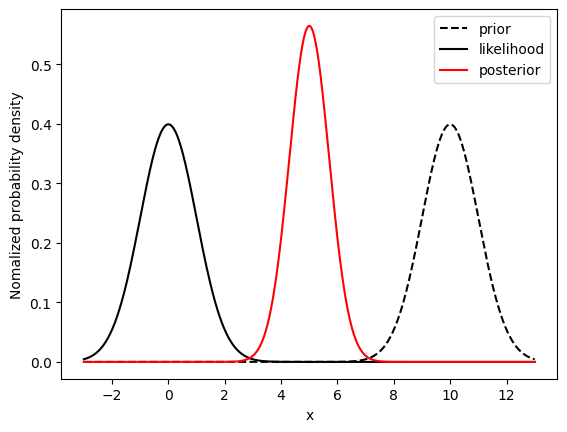

In [15]:
#function call
posterior(Norm_10,Norm_0)

**Fig 1:** The prior in this figure is a normal distribution with a mean of 10 and variance of 1, and the likelihood is a normal distribution with a mean of 0 and a variance of 1. The posterior in this case has a mean around 5, which shows that in this case, the posterior results in an average between that of the prior and likelihood.


/tmp/ipython-input-3676833515.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


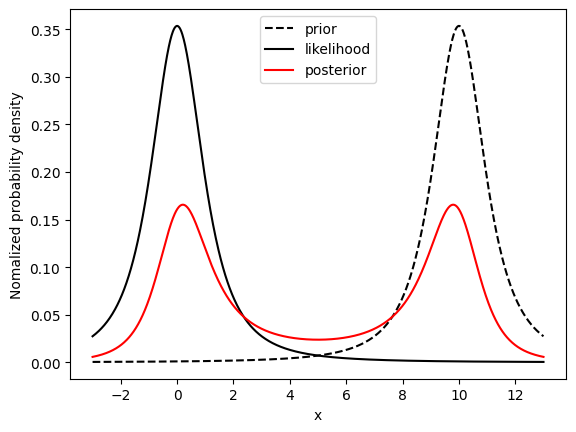

In [20]:
posterior(tStudent_10,tStudent_0)

**Fig 2:** The prior in this figure is a Student's-t distribution with 2 degrees of freedom and centered on 10, and the likelihood is a Student's-t distribution with 2 degrees of freedom and centered on 0. The posterior in this case is a bimodal distribution with peaks around 0 and 10, which is notably not a distribution that falls between the prior and likelihood as was the case in Figure 1.

/tmp/ipython-input-3676833515.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


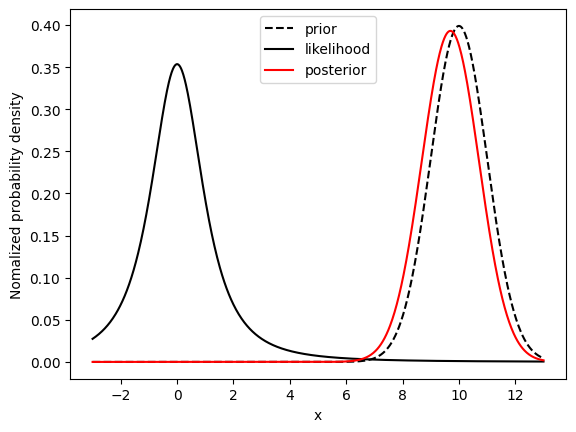

In [21]:
posterior(Norm_10,tStudent_0)

**Fig 3:** The prior in this function is a normal distribution with a mean of 10 and a variance of 1, and the likelihood is a Student's-t distribution with 2 degrees of freedom and centered on 0. The posterior in this case is a distribution with a mean less than 10 but greater than nine, showing that in this case the likelihood did not have as much of an effect on the posterior as might be expected qualitatively.

/tmp/ipython-input-3676833515.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  this_posterior /= np.trapz(this_posterior, x)


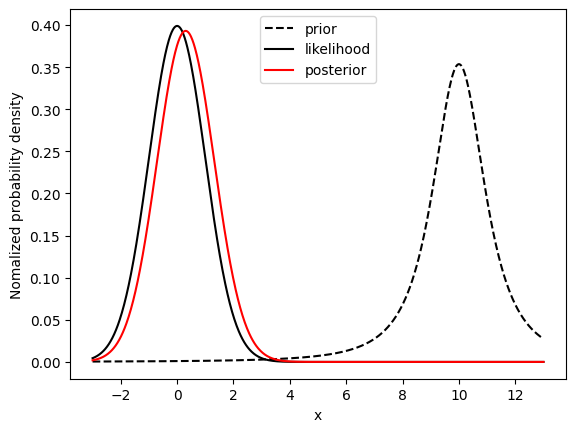

In [23]:
posterior(tStudent_10,Norm_0)

**Fig4：** The prior in this function is a Student's-t distribution with 2 degrees of freedom and centered on 0, and the likelihood is a normal distribution with a mean of 10 and a variance of 1. The posterior in this case is a distribution with a mean greater than 0 but less than one, showing that in this case the posterior is much different compared to the prior, which contrasts with Figure 3.
